#### 线性近似

(-0.25, 1.25)

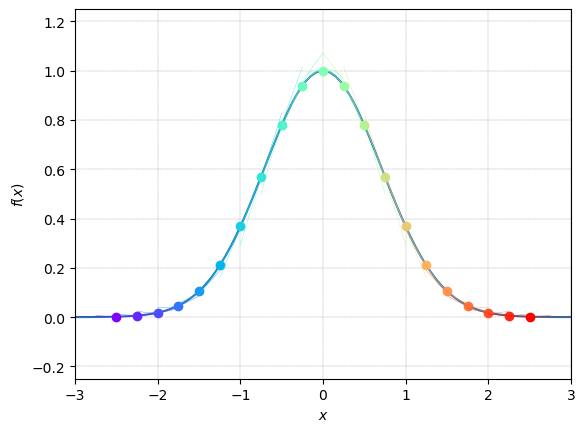

In [21]:
from sympy import lambdify, diff, evalf, sin, exp
from sympy.abc import x
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

# 定义函数
f_x = exp(-x ** 2)

x_array = np.linspace(-3, 3, 100)
x_0_array = np.linspace(-2.5, 2.5, 21)
# f_x.evalf(subs = {x: 0})

# 转换为可用函数
f_x_fcn = lambdify(x, f_x)
f_x_array = f_x_fcn(x_array)

plt.close('all')

colors = plt.cm.rainbow(np.linspace(0, 1, len(x_0_array)))

# 计算一阶导数
f_x_1_diff = diff(f_x, x)
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)
# 计算二阶导数
f_x_2_diff = diff(f_x, x, 2)
f_x_2_diff_fcn = lambdify(x, f_x_2_diff)

fig, ax = plt.subplots()

ax.plot(x_array, f_x_array, linewidth=1.5)
ax.set_xlabel("$\it{x}$")
ax.set_ylabel("$\it{f}(\it{x})$")

for i in np.arange(len(x_0_array)):
    color = colors[i, :]

    x_0 = x_0_array[i]
    
    # 计算 y_0 近似值
    y_0 = f_x.evalf(subs={x: x_0})
    
    # x_0 邻域范围
    x_t_array = np.linspace(x_0 - 0.5, x_0 + 0.5, 50)
    # 0一阶导数值
    b = f_x_1_diff.evalf(subs={x: x_0})
    # 二阶导数值
    a = f_x_2_diff.evalf(subs={x: x_0})

    # 二阶近似
    second_order_f = a / 2 * (x - x_0) ** 2 + b * (x - x_0) + y_0
    # 转换为可用函数
    second_order_f_fcn = lambdify(x, second_order_f)
    second_order_f_array = second_order_f_fcn(x_t_array)

    ax.plot(x_t_array, second_order_f_array, linewidth=0.25, color=color)
    ax.plot(x_0, y_0, marker='.', color=color, markersize=12)

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_xlim((x_array.min(), x_array.max()))

ax.set_xlim(-3, 3)
ax.set_ylim(-0.25, 1.25)


-2*x*exp(-x**2)


(-1.25, 1.25)

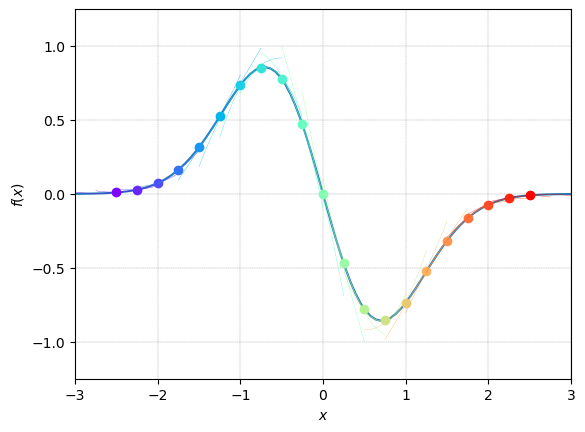

In [22]:
# 计算一阶导数
f_x_1_diff_new = diff(f_x, x)
print(f_x_1_diff)
f_x_1_diff_fcn_new = lambdify(x, f_x_1_diff_new)
f_x_1_diff_array_new = f_x_1_diff_fcn_new(x_array)

colors = plt.cm.rainbow(np.linspace(0, 1, len(x_0_array)))

# 计算二阶导数
f_x_1_diff = diff(f_x, x, 2)
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)
# 计算三阶导数
f_x_2_diff = diff(f_x, x, 3)
f_x_2_diff_fcn = lambdify(x, f_x_2_diff)

fig, ax = plt.subplots()

ax.plot(x_array, f_x_1_diff_array_new, linewidth=1.5)
ax.set_xlabel("$\it{x}$")
ax.set_ylabel("$\it{f}(\it{x})$")

for i in np.arange(len(x_0_array)):
    color = colors[i, :]

    x_0 = x_0_array[i]
    # 计算 y_0 近似值
    y_0 = f_x_1_diff_new.evalf(subs={x: x_0})
    x_t_array = np.linspace(x_0 - 0.5, x_0 + 0.5, 50)
    # 二阶导数值
    b = f_x_1_diff.evalf(subs={x: x_0})
    # 三阶导数值
    a = f_x_2_diff.evalf(subs={x: x_0})
    # 近似
    second_order_f = a / 2 * (x - x_0) ** 2 + b * (x - x_0) + y_0
    # 转换为可用函数
    second_order_f_fcn = lambdify(x, second_order_f)
    second_order_f_array = second_order_f_fcn(x_t_array)

    ax.plot(x_t_array, second_order_f_array, linewidth=0.25, color=color)
    ax.plot(x_0, y_0, marker='.', color=color,
            markersize=12)

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_xlim((x_array.min(), x_array.max()))

ax.set_xlim(-3, 3)
ax.set_ylim(-1.25, 1.25)

#### 多项式近似和误差

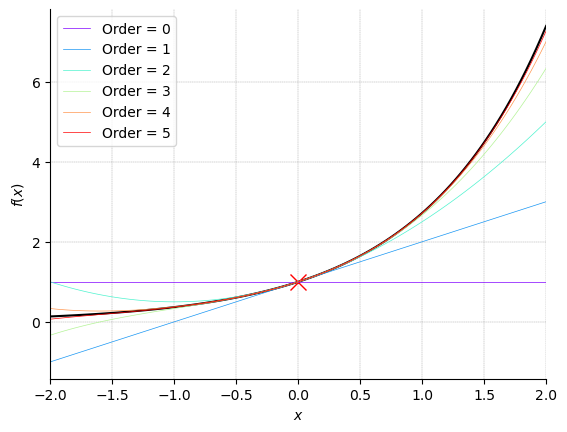

In [24]:
from sympy import latex, lambdify, diff, sin, log, exp, series
from sympy.abc import x
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

# 定义函数
f_x = exp(x)
x_array = np.linspace(-2, 2, 100)
x_0 = 0  # expansion point

# f_x = sin(x) 
# x_array = np.linspace(-10,10,100)
# x_0 = np.pi/6 # expansion

# f_x = log(x + 1) # ln(y + 1) = r
# x_array = np.linspace(-0.8,2,100)

y_0 = f_x.evalf(subs={x: x_0})

# 转换为可调用函数
f_x_fcn = lambdify(x, f_x)
f_x_array = f_x_fcn(x_array)

# Visualization

plt.close('all')

fig, ax = plt.subplots()

ax.plot(x_array, f_x_array, 'k', linewidth=1.5)
ax.plot(x_0, y_0, 'xr', markersize=12)
ax.set_xlabel("$\it{x}$")
ax.set_ylabel("$\it{f}(\it{x})$")

highest_order = 5
# 阶数
order_array = np.arange(0, highest_order + 1)

colors = plt.cm.rainbow(np.linspace(0, 1, len(order_array)))

i = 0

for order in order_array:
    
    # sympy.series() 求解泰勒展开级数符号式
    # removeO() 方法去除了 Taylor 展开中的高阶项
    f_series = f_x.series(x, x_0, order + 1).removeO()
    # order + 1 = number of terms
    
    # 转换为可调用的函数
    f_series_fcn = lambdify(x, f_series)
    f_series_array = f_series_fcn(x_array)

    ax.plot(x_array, x_array * 0 + f_series_array, linewidth=0.5,
            color=colors[i, :],
            label='Order = %0.0f' % order)

    i += 1

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_xlim(x_array.min(), x_array.max())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# ax.set_ylim(x_array.min(),x_array.max())
# ax.set_aspect('equal', 'box')
plt.legend()


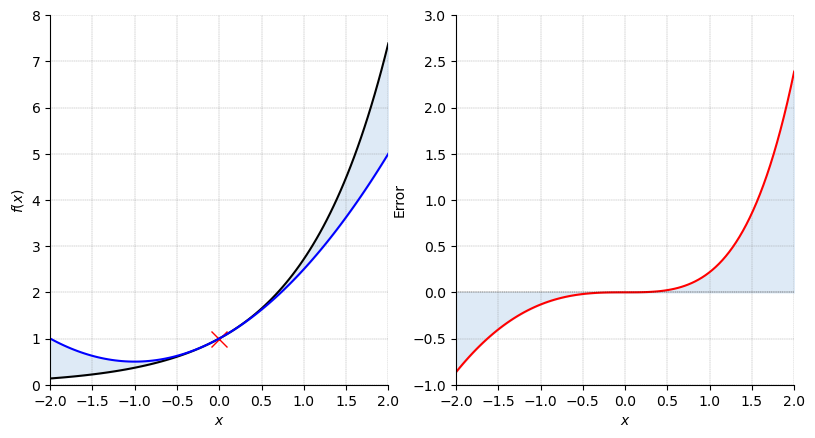

In [29]:
# plt.figaspect(0.5) 用于指定图形的横纵比例为 2:1

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1)

ax.plot(x_array, f_x_array, 'k', linewidth=1.5)
ax.plot(x_0, y_0, 'xr', markersize=12)
ax.set_xlabel("$\it{x}$")
ax.set_ylabel("$\it{f}(\it{x})$")

highest_order = 2

f_series = f_x.series(x, x_0, highest_order + 1).removeO()
# order + 1 = number of terms

# 转换为可调用函数
f_series_fcn = lambdify(x, f_series)
f_series_array = f_series_fcn(x_array)
f_series_array = x_array * 0 + f_series_array

ax.plot(x_array, f_series_array, linewidth=1.5, color='b')

ax.fill_between(x_array,
                f_x_array,
                x_array * 0 + f_series_array,
                color='#DEEAF6')

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_xlim(x_array.min(), x_array.max())

ax.set_ylim(np.floor(f_x_array.min()),
            np.ceil(f_x_array.max()))
# ax.set_aspect('equal', 'box')
# plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(1, 2, 2)

error = f_x_array - f_series_array
ax.plot(x_array, error, 'r', linewidth=1.5)

ax.fill_between(x_array,
                error,
                color='#DEEAF6')

plt.axhline(y=0, color='k', linestyle='--', linewidth=0.25)
ax.set_xlabel("$\it{x}$")
ax.set_ylabel("Error")

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(np.floor(error.min()), np.ceil(error.max()))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 二元泰勒展开：用多项式曲面近似

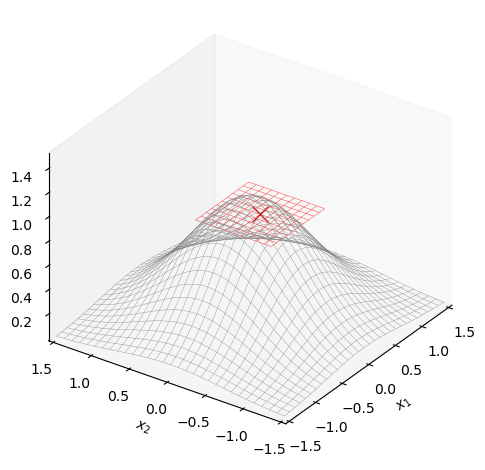

In [32]:
import numpy as np
from sympy import lambdify, diff, exp, latex, simplify
from sympy.abc import x, y
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

num = 301;  # number of mesh grids
x_array = np.linspace(-1.5, 1.5, num)
y_array = np.linspace(-1.5, 1.5, num)

# global mesh
xx, yy = np.meshgrid(x_array, y_array)

num_stride = 10

plt.close('all')

# 定义函数
f_xy = exp(-x ** 2 - y ** 2)
# 转换为可调用函数
f_xy_fcn = lambdify([x, y], f_xy)
f_xy_zz = f_xy_fcn(xx, yy)

# expansion point
x_a = -0.1
y_b = -0.2

# local mesh
x_a_array = np.linspace(x_a - 0.5, x_a + 0.5, 101)
y_b_array = np.linspace(y_b - 0.5, y_b + 0.5, 101)

xx_local, yy_local = np.meshgrid(x_a_array, y_b_array)

# f_xy_zz_local = f_xy_fcn(xx_local, yy_local)

# expansion point
f_ab = f_xy_fcn(x_a, y_b)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx, yy, f_xy_zz,
                  color=[0.5, 0.5, 0.5],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)

approx_zero_order = f_ab + xx_local * 0

ax.plot_wireframe(xx_local, yy_local, approx_zero_order,
                  color=[1, 0, 0],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)

ax.plot(x_a, y_b, f_ab, marker='x', color='r', markersize=12)

ax.set_proj_type('ortho')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(f_xy_zz.min(), 1.5)

ax.view_init(azim=-145, elev=30)
# ax.view_init(azim=-90, elev=0)

plt.tight_layout()
ax.grid(False)
plt.show()


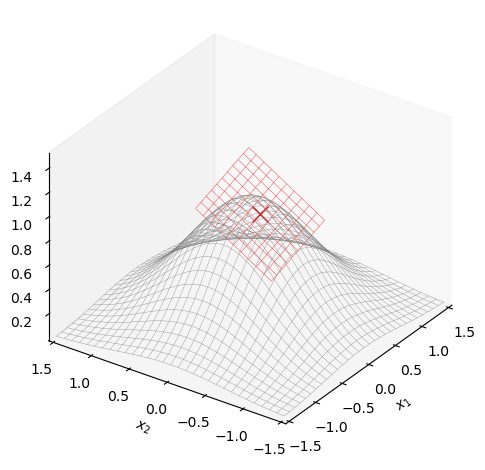

In [34]:
# 计算导数
df_dx = f_xy.diff(x)
df_dx_fcn = lambdify([x, y], df_dx)
df_dx_a_b = df_dx_fcn(x_a, y_b)

df_dy = f_xy.diff(y)
df_dy_fcn = lambdify([x, y], df_dy)
df_dy_a_b = df_dy_fcn(x_a, y_b)

approx_first_order = approx_zero_order + df_dx_a_b * (xx_local - x_a) + df_dy_a_b * (yy_local - y_b)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx, yy, f_xy_zz,
                  color=[0.5, 0.5, 0.5],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)

ax.plot_wireframe(xx_local, yy_local, approx_first_order,
                  color=[1, 0, 0],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)

ax.plot(x_a, y_b, f_ab, marker='x', color='r',
        markersize=12)

ax.set_proj_type('ortho')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(f_xy_zz.min(), 1.5)

ax.view_init(azim=-145, elev=30)
# ax.view_init(azim=-90, elev=0)

plt.tight_layout()
ax.grid(False)
plt.show()


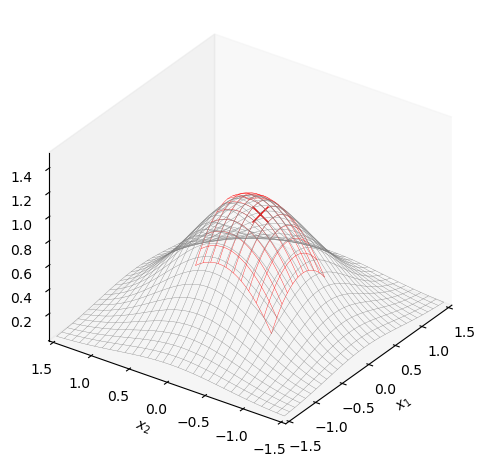

In [36]:
# 计算二阶导数
d2f_dxdx = f_xy.diff(x, 2)
d2f_dxdx_fcn = lambdify([x, y], d2f_dxdx)
d2f_dxdx_a_b = d2f_dxdx_fcn(x_a, y_b)

d2f_dxdy = f_xy.diff(x, y)
d2f_dxdy_fcn = lambdify([x, y], d2f_dxdy)
d2f_dxdy_a_b = d2f_dxdy_fcn(x_a, y_b)

d2f_dydy = f_xy.diff(y, 2)
d2f_dydy_fcn = lambdify([x, y], d2f_dydy)
d2f_dydy_a_b = d2f_dydy_fcn(x_a, y_b)

# 二阶近似
approx_second_order = approx_first_order + (d2f_dxdx_a_b * (xx_local - x_a) ** 2
                                            + 2 * d2f_dxdy_a_b * (xx_local - x_a) * (yy_local - y_b)
                                            + d2f_dydy_a_b * (yy_local - y_b) ** 2) / 2

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx, yy, f_xy_zz,
                  color=[0.5, 0.5, 0.5],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)

ax.plot_wireframe(xx_local, yy_local, approx_second_order,
                  color=[1, 0, 0],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)

ax.plot(x_a, y_b, f_ab, marker='x', color='r', markersize=12)

ax.set_proj_type('ortho')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(f_xy_zz.min(), 1.5)

ax.view_init(azim=-145, elev=30)
# ax.view_init(azim=-90, elev=0)

plt.tight_layout()
ax.grid(False)
plt.show()

#### 数值微分

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
from sympy import latex, lambdify, diff, sin, log, exp


def num_diff(f, a, method, dx):
    # f: function handle
    # a: expansion point
    # method: 'forward', 'backward', and 'central'
    # dx: step size

    if method == 'central':
        return (f(a + dx) - f(a - dx)) / (2 * dx)
    elif method == 'forward':
        return (f(a + dx) - f(a)) / dx
    elif method == 'backward':
        return (f(a) - f(a - dx)) / dx
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")


(-3.0, 3.0)

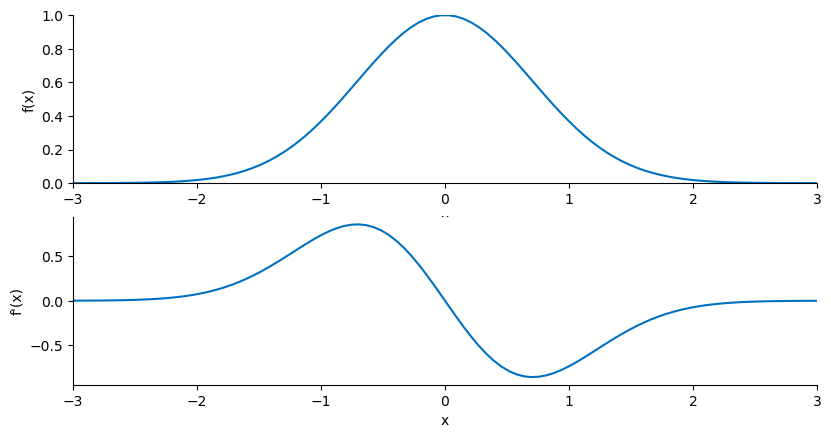

In [38]:
# 定义函数
f_x = exp(-x ** 2)
x_array = np.linspace(-3, 3, 100)
a_array = np.linspace(-2.5, 2.5, 11)
# 转换为可调用函数
f_x_fcn = lambdify(x, f_x)
f_x_array = f_x_fcn(x_array)
# 计算一阶导数
f_x_1_diff = diff(f_x, x)
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)
f_x_1_diff_array = f_x_1_diff_fcn(x_array)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(2, 1, 1)

ax.plot(x_array, f_x_array, '#0070C0', linewidth=1.5)
ax.set_ylim(np.floor(f_x_array.min()),
            np.ceil(f_x_array.max()))

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim((x_array.min(), x_array.max()))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(2, 1, 2)

ax.plot(x_array, f_x_1_diff_array, '#0070C0', linewidth=1.5)

ax.set_xlabel('x')
ax.set_ylabel('f\'(x)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim((x_array.min(), x_array.max()))


#### 比较中心差分、向前差分、向后差分的结果

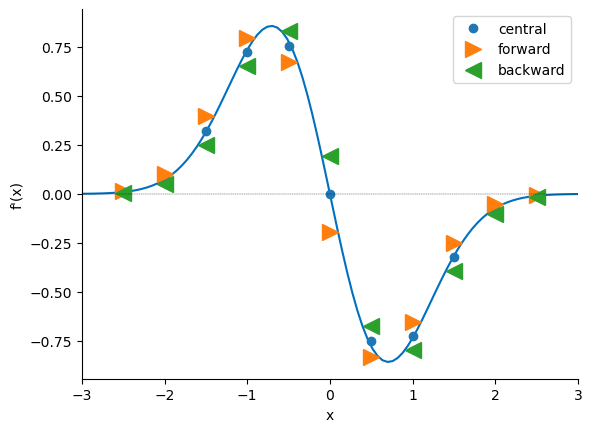

In [41]:
x_array = np.linspace(-3, 3, 100)

dx = 0.2

diff_central = num_diff(f_x_fcn, a_array, 'central', dx)
diff_forward = num_diff(f_x_fcn, a_array, 'forward', dx)
diff_backward = num_diff(f_x_fcn, a_array, 'backward', dx)

fig, ax = plt.subplots()

ax.plot(x_array, f_x_1_diff_array, '#0070C0', linewidth=1.5)

ax.plot(a_array, diff_central, marker='.',
        markersize=12, linestyle='none',
        label='central')

ax.plot(a_array, diff_forward, marker='>',
        markersize=12, linestyle='none',
        label='forward')

ax.plot(a_array, diff_backward, marker='<',
        markersize=12, linestyle='none',
        label='backward')

ax.set_xlabel('x')
ax.set_ylabel('f\'(x)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim((x_array.min(), x_array.max()))
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.25)
plt.legend()


#### 步长不同时中心差分、向前差分、向后差分结果

Text(0, 0.5, "f'(x)")

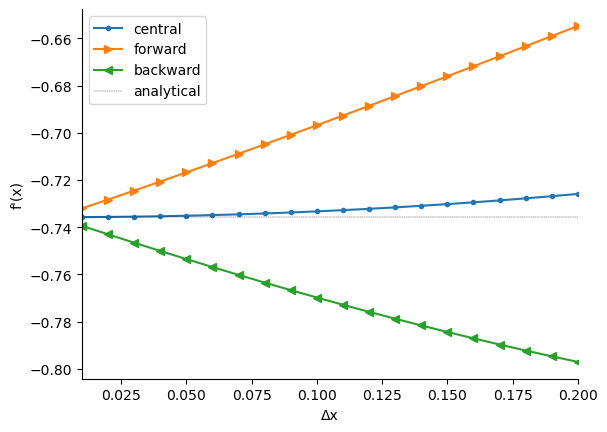

In [42]:
dx_array = np.linspace(0.01, 0.2, 20)

a = 1

diff_central = num_diff(f_x_fcn, a, 'central', dx_array)
diff_forward = num_diff(f_x_fcn, a, 'forward', dx_array)
diff_backward = num_diff(f_x_fcn, a, 'backward', dx_array)

f_x_1_diff_a = f_x_1_diff_fcn(a)

fig, ax = plt.subplots()

ax.plot(dx_array, diff_central, linewidth=1.5,
        marker='.', label='central')

ax.plot(dx_array, diff_forward, linewidth=1.5,
        marker='>', label='forward')

ax.plot(dx_array, diff_backward, linewidth=1.5,
        marker='<', label='backward')

plt.axhline(y=f_x_1_diff_a, color='k', linestyle='--',
            linewidth=0.25, label='analytical')

ax.set_xlim((dx_array.min(), dx_array.max()))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
ax.set_xlabel('\u0394x')
ax.set_ylabel('f\'(x)')